# Image Analyzer OOP - example

## Libraries and settings

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\Scientific_Programming_FS2023\scientific_programming\Week_08\challenge


## ImageAnalyzer class

In [8]:
class ImageAnalyzer:
    def __init__(self, image):
        self.image = image

    def show(self):
        """Plots the image"""

        plt.imshow(self.image)
        plt.show()

    def get_size(self):
        """Gets image size in number of pixels"""

        return self.image.shape

    def get_pixel_value(self, row, col):
        """Gets single pixel value"""

        return self.image[row, col]

    def get_grayscale(self):
        """Changes colors to grayscale"""

        return np.mean(self.image, axis=2)

    def get_histogram(self):
        """Creates overlapping histograms of rgb colors"""

        # RGB-Colors
        self.red = self.image[:, :, 0].ravel()
        self.green = self.image[:, :, 1].ravel()
        self.blue = self.image[:, :, 2].ravel()

        # Histograms
        fig, ax = plt.subplots(figsize=(6,4))
        ax.hist(self.red, bins=256, color='red', alpha=1)
        ax.hist(self.green, bins=256, color='green', alpha=1)
        ax.hist(self.blue, bins=256, color='blue', alpha=1)
        ax.set_xlim([0, 256])
        ax.set_xlabel('Color Value')
        ax.set_ylabel('Frequency')
        ax.set_title('Color Histogram')

        return plt.show()
    
    def get_dataframe(self):
        """Creates a pandas dataframe from RGB-colors"""

        # RGB-Colors
        self.red = self.image[:, :, 0].ravel()
        self.green = self.image[:, :, 1].ravel()
        self.blue = self.image[:, :, 2].ravel()

        df = pd.DataFrame({'RED': self.red, 
                           'GREEN': self.green,
                           'BLUE': self.blue})

        return df



## Analyze image

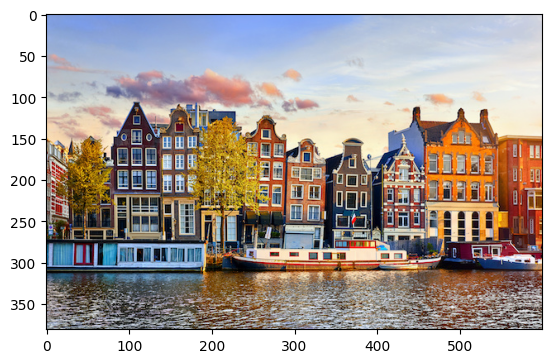

Image size: 381 x 600
Pixel value at (100, 50): [205 211 209]


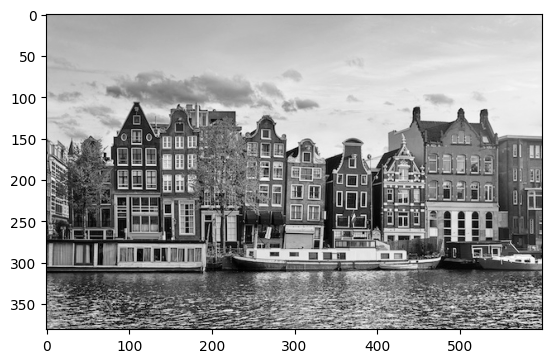

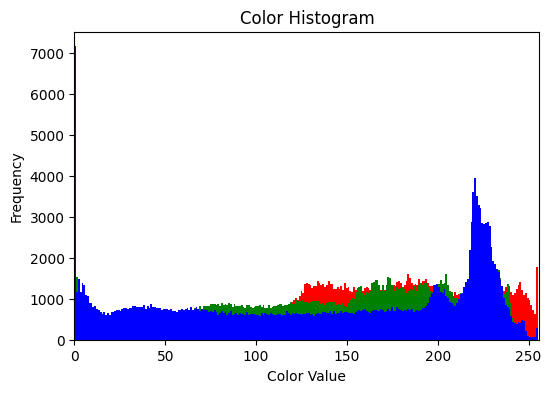

,RED,GREEN,BLUE
0,129,155,216
1,128,154,215
2,128,153,217
3,128,153,217
4,127,155,218
...,...,...,...
228595,107,106,104
228596,81,69,73
228597,148,144,145
228598,117,115,116


In [9]:
# Read image
image = plt.imread('amsterdam-canal-house.jpeg')

# Crate instance of the ImageAnalyzer class
analyzer = ImageAnalyzer(image)

# Show the image
analyzer.show()

# Get image size
size = analyzer.get_size()
print(f"Image size: {size[0]} x {size[1]}")

# Get pixel value
pixel_value = analyzer.get_pixel_value(100, 50)
print(f"Pixel value at (100, 50): {pixel_value}")

# Plot gray-scale version
grayscale = analyzer.get_grayscale()
plt.imshow(grayscale, cmap='gray')
plt.show()

# Plot histogram of RGB colors
histogram = analyzer.get_histogram()

# Write RGB - color values to a data frame
df = analyzer.get_dataframe()
df


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [4]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-04-19 16:04:00
Python Version: 3.10.9
-----------------------------------
